## Javad Ranjbar Kermani
## SVM (support vector method)

In [356]:
# import libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [357]:
df = pd.read_csv('micro_test_data.txt', names = ['Feature1', 'Feature2', 'target'])
df.head()

,Feature1,Feature2,target
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [358]:
x = df.drop(['target'],axis=1).values #features
y = df['target'].values #target

In [359]:
# splitting the dataset by sklearn train_test_split model selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Linear kernel

In [360]:
# SVM method for training the model
from sklearn.svm import SVC
# model1 : linear kernel
linear_model = SVC(kernel='linear')
linear_model.fit(x_train,y_train)

SVC(kernel='linear')

In [362]:
# scoring linear model
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score, classification_report
y_pred_linear_model = linear_model.predict(x_test)
print('precision score =', precision_score(y_test, y_pred_linear_model), '\n')
print('accuracy score =', accuracy_score(y_test, y_pred_linear_model), '\n')
print('f1 score =', f1_score(y_test, y_pred_linear_model), '\n')
print('recall score =',recall_score(y_test, y_pred_linear_model), '\n')

precision score = 0.4 

accuracy score = 0.375 

f1 score = 0.4444444444444445 

recall score = 0.5 



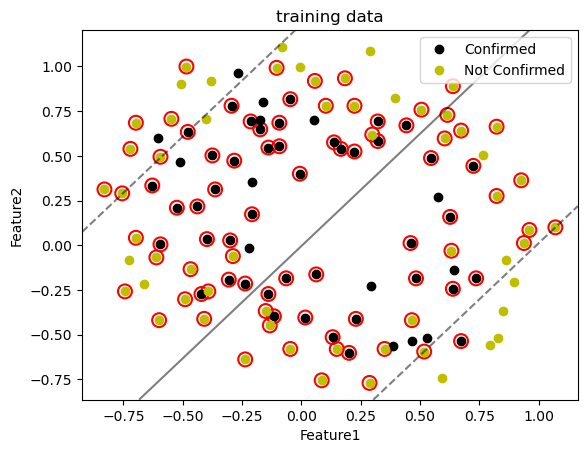

In [363]:
#plot SVM classification linear kernel
import numpy as np

x=df.values
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('training data')
plt.plot(df['Feature1'][df['target']==1],
         df['Feature2'][df['target']==1], 'ko',
         label='Confirmed')
plt.plot(df['Feature1'][df['target']==0],
         df['Feature2'][df['target']==0], 'yo',
         label='Not Confirmed')
plt.legend()

ax=plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

#create grid to evaluate model
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
XX,YY= np.meshgrid(xx,yy)

xy=np.vstack([XX.ravel(),YY.ravel()]).T
z= linear_model.decision_function(xy).reshape(XX.shape)

#plot decision boundary and margins
ax.contour(XX,YY,z ,colors='k',levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

# plot support vectors
ax.scatter(linear_model.support_vectors_[:,0],linear_model.support_vectors_[:,1], s=100, linewidth=1.5, facecolors='none', edgecolors='r')
plt.show()

### Poly kernel 

In [364]:
# model2 : poly kernel with different degrees
poly2_model = SVC(kernel='poly', degree = 2) #poly degree2
poly3_model = SVC(kernel='poly', degree = 3) #poly degree3
poly4_model = SVC(kernel='poly', degree = 4) #poly degree4
poly2_model.fit(x_train,y_train)
poly3_model.fit(x_train,y_train)
poly4_model.fit(x_train,y_train)

SVC(degree=4, kernel='poly')

In [366]:
#scoring poly model
y_pred_poly2_model = poly2_model.predict(x_test)
y_pred_poly3_model = poly3_model.predict(x_test)
y_pred_poly4_model = poly4_model.predict(x_test)
print('poly kernel degree2 :', '\n')
print('precision score poly2 =', precision_score(y_test, y_pred_poly2_model))
print('accuracy score poly2 =', accuracy_score(y_test, y_pred_poly2_model))
print('f1 score poly2 =', f1_score(y_test, y_pred_poly2_model))
print('recall score poly2=',recall_score(y_test, y_pred_poly2_model), '\n')
print('poly kernel degree3 :', '\n')
print('precision score poly3 =', precision_score(y_test, y_pred_poly3_model))
print('accuracy score poly3 =', accuracy_score(y_test, y_pred_poly3_model))
print('f1 score poly3 =', f1_score(y_test, y_pred_poly3_model))
print('recall score poly3=',recall_score(y_test, y_pred_poly3_model), '\n')
print('poly kernel degree4 :', '\n')
print('precision score poly4 =', precision_score(y_test, y_pred_poly4_model))
print('accuracy score poly4 =', accuracy_score(y_test, y_pred_poly4_model))
print('f1 score poly4 =', f1_score(y_test, y_pred_poly4_model))
print('recall score poly4=',recall_score(y_test, y_pred_poly4_model), '\n')

poly kernel degree2 : 

precision score poly2 = 1.0
accuracy score poly2 = 0.9583333333333334
f1 score poly2 = 0.9565217391304348
recall score poly2= 0.9166666666666666 

poly kernel degree3 : 

precision score poly3 = 0.631578947368421
accuracy score poly3 = 0.7083333333333334
f1 score poly3 = 0.7741935483870968
recall score poly3= 1.0 

poly kernel degree4 : 

precision score poly4 = 0.8
accuracy score poly4 = 0.875
f1 score poly4 = 0.888888888888889
recall score poly4= 1.0 



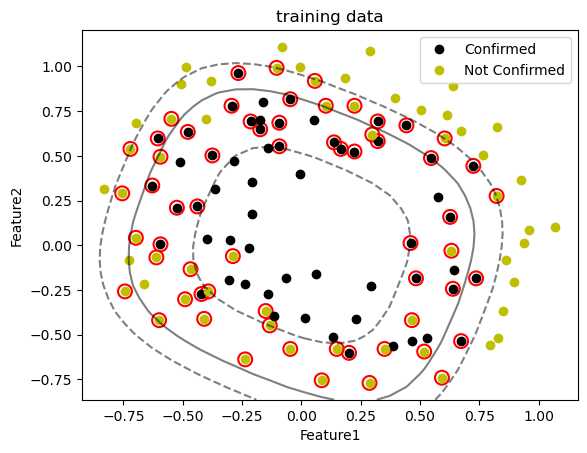

In [367]:
#plot SVM classification poly kernel
x=df.values
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('training data')
plt.plot(df['Feature1'][df['target']==1],
         df['Feature2'][df['target']==1], 'ko',
         label='Confirmed')
plt.plot(df['Feature1'][df['target']==0],
         df['Feature2'][df['target']==0], 'yo',
         label='Not Confirmed')
plt.legend()

ax=plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

#create grid to evaluate model
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
XX,YY= np.meshgrid(xx,yy)

xy=np.vstack([XX.ravel(),YY.ravel()]).T
z= poly4_model.decision_function(xy).reshape(XX.shape)

#plot decision boundary and margins
ax.contour(XX,YY,z ,colors='k',levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

# plot support vectors
ax.scatter(poly4_model.support_vectors_[:,0],poly4_model.support_vectors_[:,1], s=100, linewidth=1.5, facecolors='none', edgecolors='r')
plt.show()

### rbf kernel

In [368]:
# model3 : rbf kernel
rbf_model = SVC(kernel='rbf' , gamma = 'scale')
rbf_model.fit(x_train,y_train)

SVC()

In [370]:
#scoring rbf model
y_pred_rbf_model = rbf_model.predict(x_test)
print('precision score =', precision_score(y_test, y_pred_rbf_model), '\n')
print('accuracy score =', accuracy_score(y_test, y_pred_rbf_model), '\n')
print('f1 score =', f1_score(y_test, y_pred_rbf_model), '\n')
print('recall score =',recall_score(y_test, y_pred_rbf_model), '\n')

precision score = 0.9 

accuracy score = 0.8333333333333334 

f1 score = 0.8181818181818182 

recall score = 0.75 



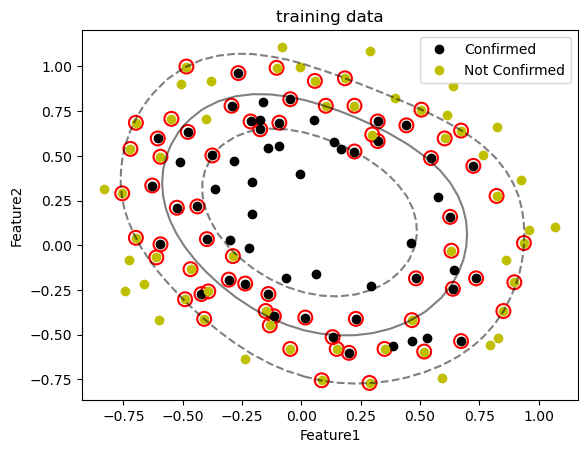

In [371]:
#plot SVM classification rbf kernel
x=df.values
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('training data')
plt.plot(df['Feature1'][df['target']==1],
         df['Feature2'][df['target']==1], 'ko',
         label='Confirmed')
plt.plot(df['Feature1'][df['target']==0],
         df['Feature2'][df['target']==0], 'yo',
         label='Not Confirmed')
plt.legend()

ax=plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

#create grid to evaluate model
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
XX,YY= np.meshgrid(xx,yy)

xy=np.vstack([XX.ravel(),YY.ravel()]).T
z= rbf_model.decision_function(xy).reshape(XX.shape)

#plot decision boundary and margins
ax.contour(XX,YY,z ,colors='k',levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

# plot support vectors
ax.scatter(rbf_model.support_vectors_[:,0],rbf_model.support_vectors_[:,1], s=100, linewidth=1.5, facecolors='none', edgecolors='r')
plt.show()

### Sigmoid kernel

In [372]:
# model4 : sigmoid kernel
sigmoid_model = SVC(kernel='sigmoid')
sigmoid_model.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [374]:
#scoring sigmoid model
y_pred_sigmoid_model = sigmoid_model.predict(x_test)
print('precision score =', precision_score(y_test, y_pred_sigmoid_model), '\n')
print('accuracy score =', accuracy_score(y_test, y_pred_sigmoid_model), '\n')
print('f1 score =', f1_score(y_test, y_pred_sigmoid_model), '\n')
print('recall score =',recall_score(y_test, y_pred_sigmoid_model), '\n')

precision score = 0.36363636363636365 

accuracy score = 0.375 

f1 score = 0.34782608695652173 

recall score = 0.3333333333333333 



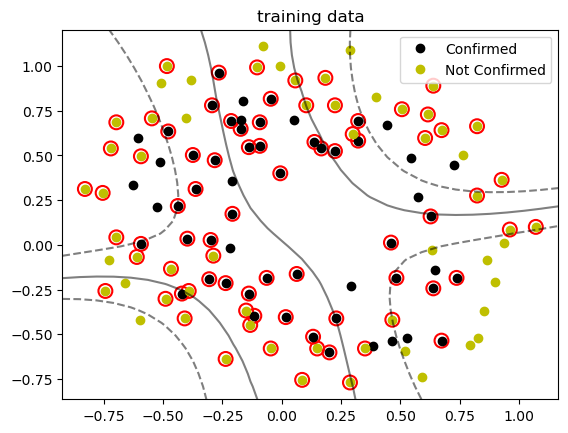

In [375]:
#plot SVM classification sigmoid kernel
x=df.values
plt.title('training data')
plt.plot(df['Feature1'][df['target']==1],
         df['Feature2'][df['target']==1], 'ko',
         label='Confirmed')
plt.plot(df['Feature1'][df['target']==0],
         df['Feature2'][df['target']==0], 'yo',
         label='Not Confirmed')
plt.legend()

ax=plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

#create grid to evaluate model
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
XX,YY= np.meshgrid(xx,yy)

xy=np.vstack([XX.ravel(),YY.ravel()]).T
z= sigmoid_model.decision_function(xy).reshape(XX.shape)

#plot decision boundary and margins
ax.contour(XX,YY,z ,colors='k',levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])

# plot support vectors
ax.scatter(sigmoid_model.support_vectors_[:,0],sigmoid_model.support_vectors_[:,1], s=100, linewidth=1.5, facecolors='none', edgecolors='r')
plt.show()

### Plot ROC and compare AUC

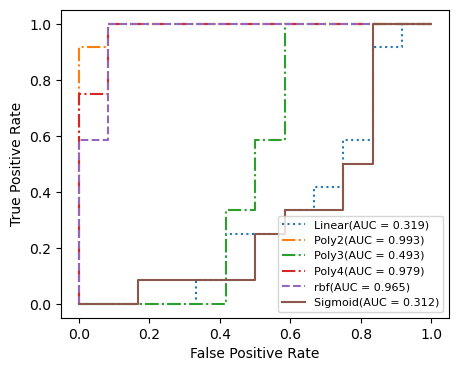

In [376]:
from sklearn.metrics import roc_curve, auc

y_pred_linear = linear_model.decision_function(x_test)
y_pred_poly2 = poly2_model.decision_function(x_test) # poly degree 2
y_pred_poly3 = poly3_model.decision_function(x_test) # poly degree 3
y_pred_poly4 = poly4_model.decision_function(x_test) # poly degree 4
y_pred_rbf = rbf_model.decision_function(x_test) 
y_pred_sigmoid = sigmoid_model.decision_function(x_test)

linear_fpr, linear_tpr, threshold = roc_curve(y_test, y_pred_linear)
linear_auc = auc(linear_fpr, linear_tpr)

poly2_fpr, poly2_tpr, threshold = roc_curve(y_test, y_pred_poly2)
poly2_auc = auc(poly2_fpr, poly2_tpr)

poly3_fpr, poly3_tpr, threshold = roc_curve(y_test, y_pred_poly3)
poly3_auc = auc(poly3_fpr, poly3_tpr)

poly4_fpr, poly4_tpr, threshold = roc_curve(y_test, y_pred_poly4)
poly4_auc = auc(poly4_fpr, poly4_tpr)

rbf_fpr, rbf_tpr, threshold = roc_curve(y_test, y_pred_rbf)
rbf_auc = auc(rbf_fpr, rbf_tpr)

sigmoid_fpr, sigmoid_tpr, threshold = roc_curve(y_test, y_pred_sigmoid)
sigmoid_auc = auc(sigmoid_fpr, sigmoid_tpr)

plt.figure(figsize = (5,4))
plt.plot(linear_fpr, linear_tpr , linestyle = ':', label='Linear(AUC = %0.3f)' % linear_auc)
plt.plot(poly2_fpr, poly2_tpr, linestyle = '-.', label='Poly2(AUC = %0.3f)' % poly2_auc)
plt.plot(poly3_fpr, poly3_tpr, linestyle = '-.', label='Poly3(AUC = %0.3f)' % poly3_auc)
plt.plot(poly4_fpr, poly4_tpr, linestyle = '-.', label='Poly4(AUC = %0.3f)' % poly4_auc)
plt.plot(rbf_fpr, rbf_tpr, linestyle = '--', label='rbf(AUC = %0.3f)' % rbf_auc)
plt.plot(sigmoid_fpr, sigmoid_tpr,linestyle = '-',  label='Sigmoid(AUC = %0.3f)' % sigmoid_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, prop={'size': 8})
plt.show()
